In [4]:
import numpy as np
import cv2

from pipeline.lib import showarray

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),50)
img = cv2.line(img,(0,50),(511,50),(255,0,0),50)
img = cv2.rectangle(img,(100,100),(200,200),(0,255,0),20)
img = cv2.rectangle(img,(100,100),(200,200),(0,255,255),2)

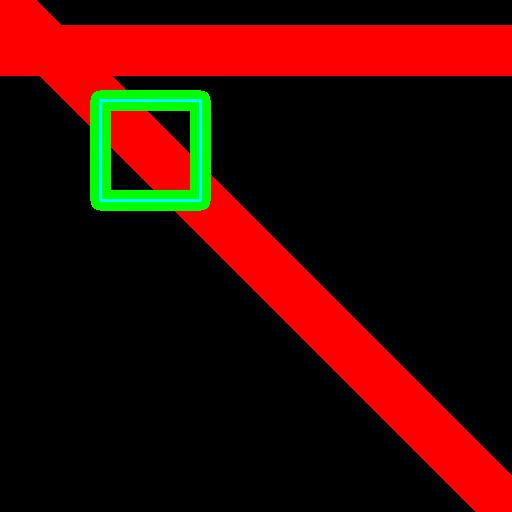

In [5]:
showarray(img)

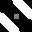

In [6]:
# Create a black image
img = np.zeros((32,32), dtype=np.uint8)
pat = np.full((4,4), 128, dtype=np.uint8)

# add a triangle

img = cv2.line(img,(0,16),(15,31),255,8)
img = cv2.line(img,(16,0),(31,15),255,8)
img = cv2.rectangle(img, (14, 14), (18, 18), 128, -1)

showarray(img) 
showarray(pat) 

In [7]:
result = cv2.matchTemplate(img, pat, cv2.TM_SQDIFF)
loc = np.where(result == 0)
pts = list(zip(*loc))
pts

[(14, 14), (14, 15), (15, 14), (15, 15)]

In [8]:
roi = img[10:20,]
showarray(roi)

In [9]:
result = cv2.matchTemplate(roi, pat, cv2.TM_SQDIFF)
loc = np.where(result <= 0.1)
pts = list(zip(*loc))
pts

[(4, 14), (4, 15), (5, 14), (5, 15)]

In [15]:
# Create a black image
img = np.full((512,512), 255, np.uint8)

# Draw several black, horizontal lines of varying thinkness

for i in range(10):
  h = 50 * (i + 1)
  th = i + 1
  cv2.line(img,(0, h),(512, h),0,th)

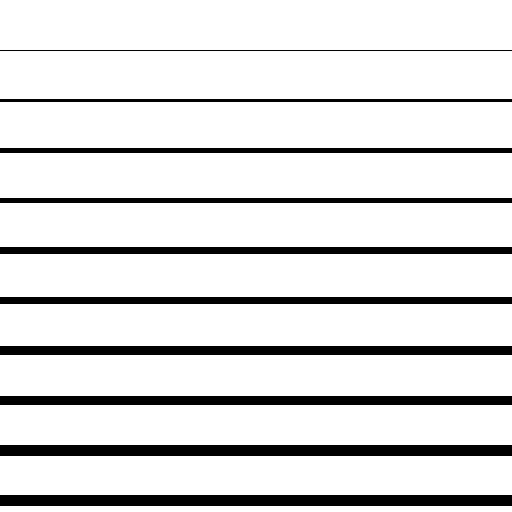

In [16]:
showarray(img)

Apply blur

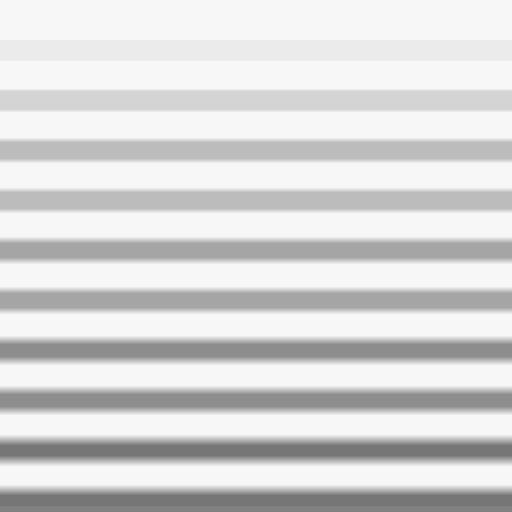

In [25]:
blurred = cv2.GaussianBlur(img, (21, 21), 60, 0)
showarray(blurred)

200.0


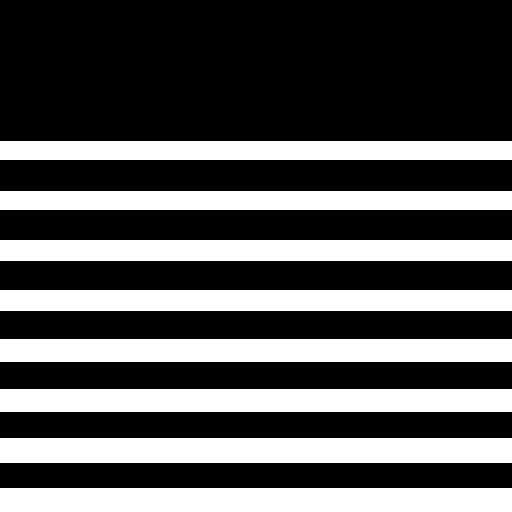

In [28]:
(th, threshed) = cv2.threshold(
    blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
)
print(th)
showarray(threshed)